In [ ]:
!pip uninstall imgaug && pip uninstall albumentations && pip install git+https://github.com/aleju/imgaug.git

Uninstalling imgaug-0.4.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.4.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.4.0
  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-aenphx1b
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-aenphx1b
y
  Created wheel for imgaug: filename=imgaug-0.4.0-cp37-none-any.whl size=971106 sha256=b6156aadff02ea8b21766bbac231329dc98c77b1848a6606980b2c4604364cb3
  Stored in directory: /tmp/pip-ephem-wheel-cache-dxv0jcf8/wheels/65/3d/94/ee32cbeaa29c473a4db74c2d21904ac747311fdca4732665f0
Successfully built imgaug


In [ ]:
!pip install transformers
!pip install -q git+https://github.com/gmihaila/ml_things.git

In [ ]:
!nvidia-smi 

Tue Apr 13 07:40:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# my imports
!pip install numpy as np
!pip install pandas as pd
!pip install sklearn.utils 
!pip install BackTranslation

Processing /root/.cache/pip/wheels/eb/4e/57/de4e188f2e7989e7e45e07af4fea41237ae77b9931f3c82c26/sklearn_utils-0.0.15-cp37-none-any.whl


In [ ]:
import os
import csv
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from BackTranslation import BackTranslation

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


In [ ]:
import io
import os
import torch
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from ml_things import plot_dict, plot_confusion_matrix, fix_text
from sklearn.metrics import classification_report, accuracy_score
from transformers import (set_seed,
                          TrainingArguments,
                          Trainer,
                          GPT2Config,
                          GPT2Tokenizer,
                          AdamW, 
                          get_linear_schedule_with_warmup,
                          GPT2ForSequenceClassification)


set_seed(123)

epochs = 4
batch_size = 128
max_length = 60
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name_or_path = 'gpt2'
labels_ids = {'AGAINST': 0, 'FAVOR': 1, 'NONE' : 2, "UNKNOWN": 3}
n_labels = len(labels_ids)


In [ ]:
set_seed(42)
epochs = 4
batch_size = 282
max_length = 60
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name_or_path = 'gpt2'
labels_ids = {'AGAINST': 0, 'FAVOR': 1, 'NONE' : 2,"UNKNOWN":3}
n_labels = len(labels_ids)

In [ ]:
set_seed(3535999445)

epochs = 4
batch_size = 8
max_length = 60
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name_or_path = 'gpt2'
labels_ids = {'AGAINST': 0, 'FAVOR': 1, 'NONE' : 2, "UNKNOWN": 3}
n_labels = len(labels_ids)

In [ ]:
    class Gpt2Collator(object):
      
      def __init__(self, use_tokenizer, labels_encoder, max_sequence_len=None):

        # Tokenizer to be used inside the class.
        self.use_tokenizer = use_tokenizer
        # Check max sequence length.
        self.max_sequence_len = use_tokenizer.model_max_length if max_sequence_len is None else max_sequence_len
        # Label encoder used inside the class.
        self.labels_encoder = labels_encoder

        return
        
      def __call__(self, sequences):
        
        
        # Get all texts from sequences list.
        texts = [sequence['text'] for sequence in sequences]
        # Get all labels from sequences list.
        labels = [sequence['label'] for sequence in sequences]
        # Encode all labels using label encoder.
        #labels = [self.labels_encoder[label] for label in labels]
        # Call tokenizer on all texts to convert into tensors of numbers with 
        # appropriate padding.
        inputs = self.use_tokenizer(text=texts, return_tensors="pt", padding=True, truncation=True,  max_length=self.max_sequence_len)
        # Update the inputs with the associated encoded labels as tensor.
        inputs.update({'labels':torch.tensor(labels)})
        
        return inputs

In [ ]:
class MovieReviewsDataset(Dataset):
  def __init__(self,dataset, train, use_tokenizer):

    
    self.texts = []
    self.labels = []
    self.n_examples=0
    if train ==True:
      self.texts = dataset.trX
      print(len(self.texts))
      self.labels= dataset.trY
    elif train== False:
      self.texts = dataset.vaX
      self.labels= dataset.vaY
    else:
      self.texts = dataset.teX
      self.labels= dataset.teY  
    self.n_examples = len(self.labels)
    return
    
  def __len__(self):
    r"""When used `len` return the number of examples.

    """
    
    return (len(self.labels))

  def __getitem__(self, item):
    r"""Given an index return an example from the position.
    
    Arguments:

      item (:obj:`int`):
          Index position to pick an example to return.

    Returns:
      :obj:`Dict[str, str]`: Dictionary of inputs that contain text and 
      asociated labels.

    """
    
    return {'text':self.texts[item],
            'label':self.labels[item]}

In [ ]:
class Inputdatareader:
  
  def __init__(self,topic=None):
    seed = 3535999445
    data_dir = "/content/tweet-stance-prediction-master/data"
    path = Path(data_dir)
    trainfile = 'semeval2016-task6-trainingdata.txt'

    
    

    # train data preprocessing
    X, Y = self.stance(path/trainfile, topic=topic)

    #Gold standard/test data preprocessing
    goldfile="eval/gold.txt"
    self.teX, self.teY = self.stance(path/goldfile, topic=topic)

    # Data Augmentation on train data
    X1,Y1= self.BT_stance(X,Y)
    # Train-Valid split on Augmented Data
    tr_text, va_text, tr_sent, va_sent = train_test_split(X, Y, test_size=0.2, random_state=seed)
    #(train_dataset.trX,trY)
    self.trX = []
    self.trY = []
    for t, s in zip(tr_text, tr_sent):
        self.trX.append(t)
        self.trY.append(s)
    

    #Convert validation elements to array (train_dataset.vaX,vaY)
    self.vaX = []
    self.vaY = []
    for t, s in zip(va_text, va_sent):
        self.vaX.append(t)
        self.vaY.append(s)
   
    self.trY = np.asarray(self.trY, dtype=np.int32)
    self.vaY = np.asarray(self.vaY, dtype=np.int32)
   


  # Cleaning the tweets and converting labels to numbers.
  def stance(self,path, topic=None):
    def clean_ascii(text):
        # function to remove non-ASCII chars from data
        return ''.join(i for i in text if ord(i) < 128)
    orig = pd.read_csv(path, delimiter='\t', header=0, encoding = "latin-1")
    orig['Tweet'] = orig['Tweet'].apply(clean_ascii)
    df = orig
    # Get only those tweets that pertain to a single topic in the training data
    if topic is not None:
        df = df.loc[df['Target'] == topic]
    X = df.Tweet.values
    stances = ["AGAINST", "FAVOR", "NONE", "UNKNOWN"]
    class_nums = {s: i for i, s in enumerate(stances)}

    Y = np.array([class_nums[s] for s in df.Stance])
    return X, Y
  
    

  def BT_stance(self,X,Y):
    

    # Back Translation Algo
    r=np.array([])
    temp=np.array([])

    for i in range(2):
      
      
      #Convert np to str
      trans = BackTranslation(url=['translate.google.com'])
      result_es = trans.translate(X[i], src='en', tmp = 'es')
      #result_uk = trans.translate(X[i], src='en',tmp = 'fr')
      #result_sv = trans.translate(X[i], src='en',tmp = 'it')
      #result_sk = trans.translate(X[i], src='en',tmp = 'sk')
      # convert str to np array
      result_es.result_text=np.array(result_es.result_text)
      #result_uk.result_text=np.array(result_uk.result_text)
      #result_sv.result_text=np.array(result_sv.result_text)
      temp=np.append(temp,[X[i],result_es.result_text],axis=0)
      if (i%100)==0:
        print(i)

      #Replicating the labels for the BT text:
      
      for u in range(2):
       
        r=np.append(r,Y[i])
      r = r.astype(np.int32)
    
    #X=temp
    #Y=r
    print(temp[1:5])
    print(r[1:5])
    return temp, r

In [ ]:
print(len(train_dataloader))

NameError: ignored

In [ ]:
trr=train_dataloader
ree=[]
for batch in tqdm(trr, total=len(trr)):
  print(len(batch.items()))
  
 

In [ ]:
 for k,v in batch.items(): 
    print('asd')
print(len(k))

In [ ]:
#original train functtion
def train(dataloader, optimizer_, scheduler_, device_):
  r"""
  Train pytorch model on a single pass through the data loader.

  It will use the global variable `model` which is the transformer model 
  loaded on `_device` that we want to train on.

  This function is built with reusability in mind: it can be used as is as long
    as the `dataloader` outputs a batch in dictionary format that can be passed 
    straight into the model - `model(**batch)`.

  Arguments:

      dataloader (:obj:`torch.utils.data.dataloader.DataLoader`):
          Parsed data into batches of tensors.

      optimizer_ (:obj:`transformers.optimization.AdamW`):
          Optimizer used for training.

      scheduler_ (:obj:`torch.optim.lr_scheduler.LambdaLR`):
          PyTorch scheduler.

      device_ (:obj:`torch.device`):
          Device used to load tensors before feeding to model.

  Returns:

      :obj:`List[List[int], List[int], float]`: List of [True Labels, Predicted
        Labels, Train Average Loss].
  """

  # Use global variable for model.
  global model

  # Tracking variables.
  predictions_labels = []
  true_labels = []
  # Total loss for this epoch.
  total_loss = 0

  # Put the model into training mode.
  model.train()

  # For each batch of training data...
  for batch in tqdm(dataloader, total=len(dataloader)):

    # Add original labels - use later for evaluation.
    true_labels += batch['labels'].numpy().flatten().tolist()
    
    # move batch to device
    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}
    
    
    
    # Always clear any previously calculated gradients before performing a
    # backward pass.
    model.zero_grad()

    # Perform a forward pass (evaluate the model on this training batch).
    # This will return the loss (rather than the model output) because we
    # have provided the `labels`.
    # The documentation for this a bert model function is here: 
    # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
    outputs = model(**batch)

    # The call to `model` always returns a tuple, so we need to pull the 
    # loss value out of the tuple along with the logits. We will use logits
    # later to calculate training accuracy.
    loss, logits = outputs[:2]

    # Accumulate the training loss over all of the batches so that we can
    # calculate the average loss at the end. `loss` is a Tensor containing a
    # single value; the `.item()` function just returns the Python value 
    # from the tensor.
    total_loss += loss.item()

    # Perform a backward pass to calculate the gradients.
    loss.backward()

    # Clip the norm of the gradients to 1.0.
    # This is to help prevent the "exploding gradients" problem.
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # Update parameters and take a step using the computed gradient.
    # The optimizer dictates the "update rule"--how the parameters are
    # modified based on their gradients, the learning rate, etc.
    optimizer.step()

    # Update the learning rate.
    scheduler.step()

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()

    # Convert these logits to list of predicted labels values.
    predictions_labels += logits.argmax(axis=-1).flatten().tolist()

  # Calculate the average loss over the training data.
  avg_epoch_loss = total_loss / len(dataloader)
  
  # Return all true labels and prediction for future evaluations.
  return true_labels, predictions_labels, avg_epoch_loss


In [ ]:
 # Validaion dataset


def validation(dataloader, device_):
  
  # Use global variable for model.
  global model

  # Tracking variables
  predictions_labels = []
  true_labels = []
  #total loss for this epoch.
  total_loss = 0

  # Put the model in evaluation mode--the dropout layers behave differently
  # during evaluation.
  model.eval()

  # Evaluate data for one epoch
  for batch in tqdm(dataloader, total=len(dataloader)):

    # add original labels
    true_labels += batch['labels'].numpy().flatten().tolist()

    # move batch to device
    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up validation
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # This will return the logits rather than the loss because we have
        # not provided labels.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(**batch)

        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple along with the logits. We will use logits
        # later to to calculate training accuracy.
        loss, logits = outputs[:2]
        
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()
        
        # get predicitons to list
        predict_content = logits.argmax(axis=-1).flatten().tolist()

        # update list
        predictions_labels += predict_content

  # Calculate the average loss over the training data.
  avg_epoch_loss = total_loss / len(dataloader)

  # Return all true labels and prediciton for future evaluations.
  return true_labels, predictions_labels, avg_epoch_loss

In [ ]:
# download everything
#1)config, tokenizer, model(resiye the embeddings to the required shape)

# Get model configuration.
print('Loading configuraiton...')
model_config = GPT2Config.from_pretrained(pretrained_model_name_or_path=model_name_or_path, num_labels=n_labels)

# Get model's tokenizer.
print('Loading tokenizer...')
tokenizer = GPT2Tokenizer.from_pretrained(pretrained_model_name_or_path=model_name_or_path)
# default to left padding
tokenizer.padding_side = "left"
# Define PAD Token = EOS Token = 50256
tokenizer.pad_token = tokenizer.eos_token


# Get the actual model.
print('Loading model...')
model = GPT2ForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_name_or_path, config=model_config)

# resize model embedding to match new tokenizer
model.resize_token_embeddings(len(tokenizer))

# fix model padding token id
model.config.pad_token_id = model.config.eos_token_id

# Load model to defined device.
model.to(device)
print('Model loaded to `%s`'%device)

Loading configuraiton...
Loading tokenizer...
Loading model...


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded to `cpu`


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/tweet-stance-prediction-master.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/tweet-stance-prediction-master.zip
  inflating: .gitignore              
  inflating: analysis.py             
  inflating: datasets.py             
  inflating: LICENSE                 
  inflating: opt.py                  
  inflating: README.md               
  inflating: text_utils.py           
  inflating: train.py                
   creating: tweet-stance-prediction-master/
  inflating: tweet-stance-prediction-master/.gitignore  
   creating: tweet-stance-prediction-master/assets/
  inflating: tweet-stance-prediction-master/assets/openai_taskheads.png  
  inflating: tweet-stance-prediction-master/assets/stance_balance.png  
  inflating: tweet-stance-prediction-master/assets/transformer_arch.png  
  inflating: tweet-stance-prediction-master/assets/ulmfit_arch.png  
  inflating: tweet-stance-prediction-master/assets/wordcloud.ipynb  
   creating: tweet-stance-prediction-master/data/
   creating: tweet-stance-prediction-master/data/e

In [ ]:
#New my dataloader part 1
gpt2_classificaiton_collator = Gpt2Collator(use_tokenizer=tokenizer, labels_encoder=labels_ids, max_sequence_len=max_length)


print('Dealing with Train...')
# Create pytorch dataset.
#train_dataset = MovieReviewsDataset(path='/content/aclImdb/train', use_tokenizer=tokenizer)

#creating an instance of New data
train_dataset = Inputdatareader()

#converting data to the required GPT2 model format
dataset = MovieReviewsDataset(train_dataset,train=True, use_tokenizer=tokenizer)



print(len(dataset.texts))

print(len(dataset.labels))


#print('Created `train_dataset` with %d examples!'%len(dataset.trX))



Dealing with Train...
0
['Dear Lord, thank you for all your blessings forgive my sins gentleman give me strength and energy for this busy next day #Hope #semst'
 'Blessed are the peacemakers, for they shall be called children of God. Matthew 5:9 #scripture #peace #SemST'
 'Blessed Pacifiers, because they will be called children of God. IMATE 5: 9 #Scripture #peace #semst']
[0 0 0]
2251
2251
2251


In [ ]:
print(len(dataset))

print(dataset)


2251


In [ ]:
#New my dataloader part 2
# Move pytorch dataset into dataloader.
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True ,collate_fn=gpt2_classificaiton_collator)
#train_labelloader = DataLoader(encoding['labels'], batch_size=32, shuffle=False)
#attentionmask= encoding['attention_mask']
#train_attloader = DataLoader(encoding['attention_mask'], batch_size=32, shuffle=False)
#print('Created `train_dataloader` with %d batches!'%len(train_dataloader))
print(len(train_dataloader))
print('Dealing with Validation...')
# Create pytorch dataset.
valid_dataset =  MovieReviewsDataset(train_dataset,train=False, use_tokenizer=tokenizer)
#valid_dataset={'texts':[],'labels':[]}
#valid_dataset['texts'].append(dataset.vaX)
#valid_dataset['labels'].append(dataset.vaY)
#print('Created `valid_dataset` with %d examples!'%len(valid_dataset))

# Move pytorch dataset into dataloader.
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=gpt2_classificaiton_collator)
#print('Created `eval_dataloader` with %d batches!'%len(valid_dataloader))

282
Dealing with Validation...


In [ ]:
##New my dataloader part 3
#loading gold data for classification


#valid_dataset =  MovieReviewsDataset(train_dataset,train=False, use_tokenizer=tokenizer)
gold_dataset =  MovieReviewsDataset(train_dataset,train=None, use_tokenizer=tokenizer)
# Move pytorch dataset into dataloader.
#valid_dataloader = DataLoader(gold_dataset, batch_size=batch_size, shuffle=False, collate_fn=gpt2_classificaiton_collator)
gold_dataloader= DataLoader(gold_dataset, batch_size=batch_size, shuffle=False, collate_fn=gpt2_classificaiton_collator)
#print('Created `eval_dataloader` with %d batches!'%len(valid_dataloader))
print(len(gold_dataloader))


157


In [ ]:
print(train_dataset.teY[511:515])
print(len(gold_dataset.labels))

[0 1 2 0]
1249


In [ ]:
epochs=1
model.zero_grad()


Epoch


Training on batches...



Validation on batches...



  train_loss: 0.75986 - val_loss: 0.96929 - train_acc: 0.65971 - valid_acc: 0.57549




/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


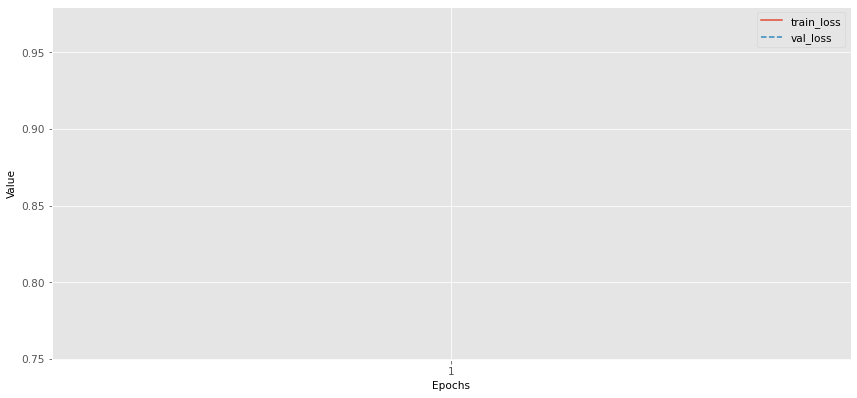

/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


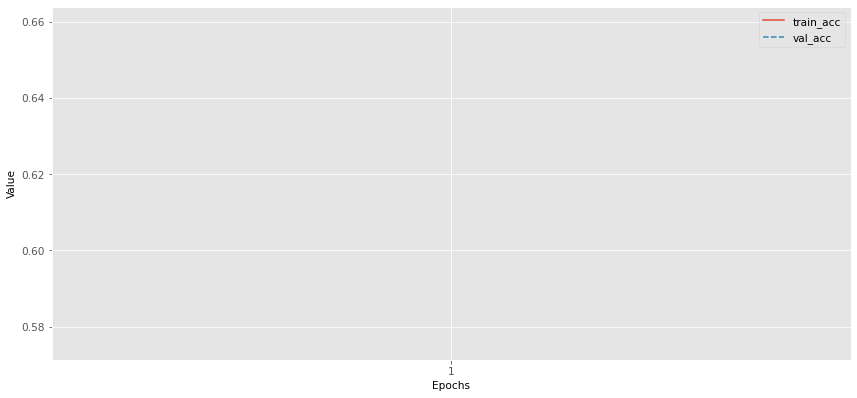

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 6.25e-5, 
                  betas=(0.9,0.999),
                  eps = 1e-8 
                  )

# Total number of training steps is number of batches * number of epochs.
# `train_dataloader` contains batched data so `len(train_dataloader)` gives 
# us the number of batches.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

# Store the average loss after each epoch so we can plot them.
all_loss = {'train_loss':[], 'val_loss':[]}
all_acc = {'train_acc':[], 'val_acc':[]}

# Loop through each epoch.
print('Epoch')
for epoch in tqdm(range(epochs)):
  
  print('Training on batches...')
  # Perform one full pass over the training set.
  train_labels, train_predict, train_loss = train(train_dataloader,optimizer, scheduler, device)
  train_acc = accuracy_score(train_labels, train_predict)

  # Get prediction form model on validation data. 
  print('Validation on batches...')
  valid_labels, valid_predict, val_loss = validation(valid_dataloader, device)
  val_acc = accuracy_score(valid_labels, valid_predict)

  # Print loss and accuracy values to see how training evolves.
  print("  train_loss: %.5f - val_loss: %.5f - train_acc: %.5f - valid_acc: %.5f"%(train_loss, val_loss, train_acc, val_acc))
  print()

  # Store the loss value for plotting the learning curve.
  all_loss['train_loss'].append(train_loss)
  all_loss['val_loss'].append(val_loss)
  all_acc['train_acc'].append(train_acc)
  all_acc['val_acc'].append(val_acc)

# Plot loss curves.
plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

# Plot accuracy curves.
plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Uninstalling matplotlib-3.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.1
     |████████████████████████████████| 13.1MB 298kB/s 
ERROR: ml-things 0.0.1 has requirement matplotlib>=3.4.0, but you'll have matplotlib 3.1.3 which is incompatible.


In [ ]:

labels_ids = {'AGAINST': 0, 'FAVOR': 1, 'NONE' : 2}

In [ ]:
true_labels, predictions_labels, avg_epoch_loss = validation(valid_dataloader, device)

# Create the evaluation report.
evaluation_report = classification_report(true_labels, predictions_labels, labels=list(labels_ids.values()), target_names=list(labels_ids.keys()))
# Show the evaluation report.
print(evaluation_report)




              precision    recall  f1-score   support

     AGAINST       0.63      0.75      0.69       274
       FAVOR       0.50      0.35      0.41       147
        NONE       0.49      0.47      0.48       142

    accuracy                           0.58       563
   macro avg       0.54      0.52      0.53       563
weighted avg       0.56      0.58      0.56       563



In [ ]:
print(predictions_labels)
print(true_labels)

[0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 

Normalized confusion matrix


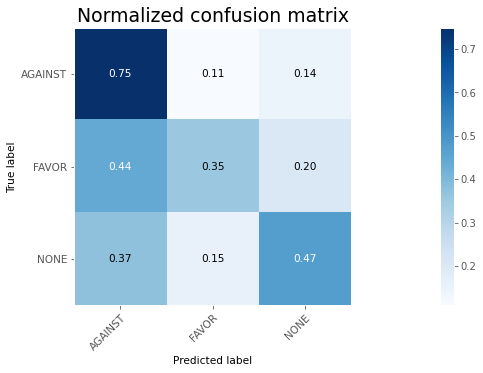

In [ ]:
# Plot confusion matrix.
plot_confusion_matrix(y_true=true_labels, y_pred=predictions_labels, 
                      classes=list(labels_ids.keys()), normalize=True, magnify=0.1);


              precision    recall  f1-score   support

     AGAINST       0.72      0.73      0.72       715
       FAVOR       0.55      0.48      0.52       304
        NONE       0.46      0.53      0.49       230

    accuracy                           0.63      1249
   macro avg       0.58      0.58      0.58      1249
weighted avg       0.63      0.63      0.63      1249

Normalized confusion matrix


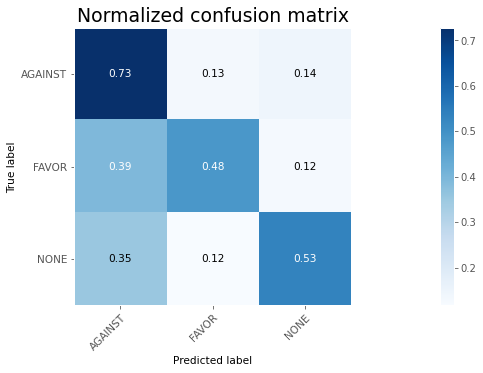

In [ ]:
true_labels, predictions_labels, avg_epoch_loss = validation(gold_dataloader, device)

# Create the evaluation report.
evaluation_report = classification_report(true_labels, predictions_labels, labels=list(labels_ids.values()), target_names=list(labels_ids.keys()))
# Show the evaluation report.
print(evaluation_report)

# Plot confusion matrix.
plot_confusion_matrix(y_true=true_labels, y_pred=predictions_labels, 
                      classes=list(labels_ids.keys()), normalize=True, 
                      magnify=0.1,
                      );

In [ ]:
print(predictions_labels)
print(true_labels)

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
epochs=8
model.zero_grad()

In [ ]:
!pip install -q git+https://github.com/gmihaila/ml_things.git

/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


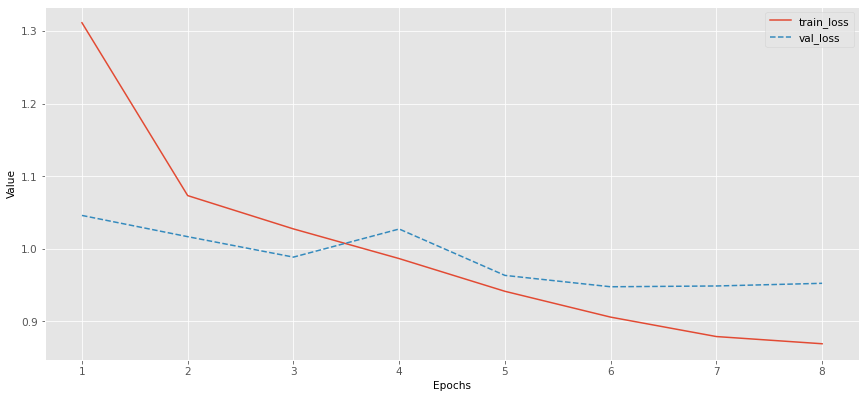

/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


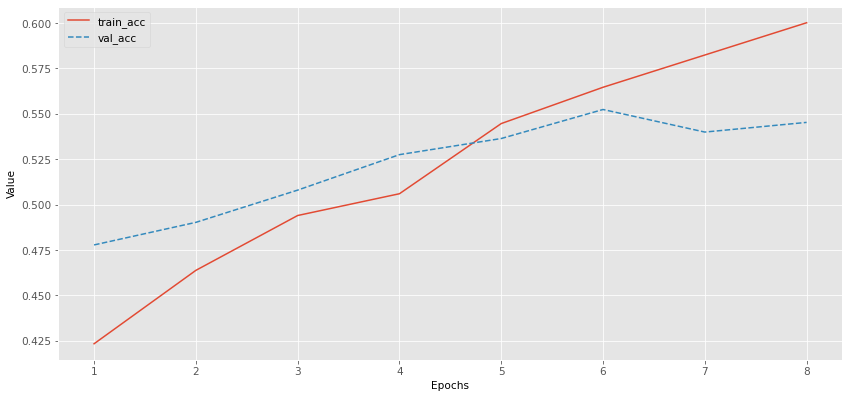

In [ ]:

# Plot loss curves.
plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

# Plot accuracy curves.
plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

In [ ]:
epochs=8
model.zero_grad()

Epoch


Training on batches...



Validation on batches...



  train_loss: 0.89778 - val_loss: 0.94590 - train_acc: 0.58152 - valid_acc: 0.55240

Training on batches...



Validation on batches...



  train_loss: 0.80166 - val_loss: 1.04129 - train_acc: 0.63394 - valid_acc: 0.57371

Training on batches...



Validation on batches...



  train_loss: 0.72983 - val_loss: 1.01573 - train_acc: 0.66770 - valid_acc: 0.57194

Training on batches...



Validation on batches...



  train_loss: 0.69724 - val_loss: 1.09854 - train_acc: 0.68858 - valid_acc: 0.58792

Training on batches...



Validation on batches...



  train_loss: 0.64089 - val_loss: 1.12643 - train_acc: 0.72945 - valid_acc: 0.58259

Training on batches...



Validation on batches...



  train_loss: 0.56061 - val_loss: 1.19320 - train_acc: 0.75922 - valid_acc: 0.58259

Training on batches...



Validation on batches...



  train_loss: 0.55753 - val_loss: 1.18922 - train_acc: 0.75300 - valid_acc: 0.57194

Training on batches...



Validation on batches...



  train_loss: 0.48798 - val_loss: 1.24600 - train_acc: 0.79609 - valid_acc: 0.57904




/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


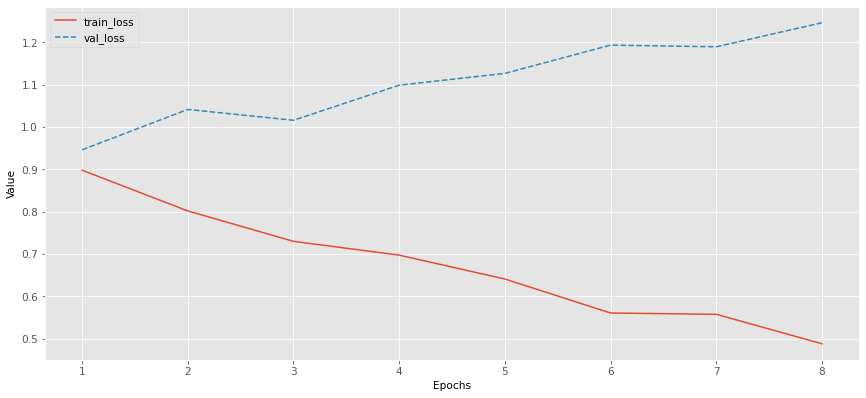

/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


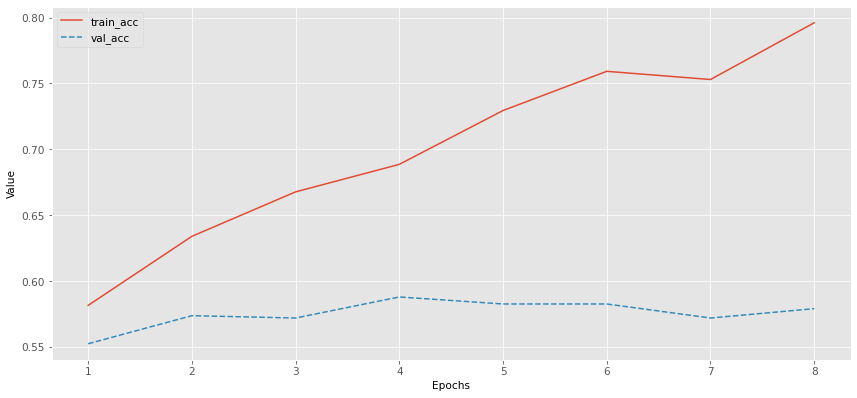

In [ ]:
# Default given by paper lr=5e-5 & epoch=8
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # default is 1e-8.
                  )

# Total number of training steps is number of batches * number of epochs.
# `train_dataloader` contains batched data so `len(train_dataloader)` gives 
# us the number of batches.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

# Store the average loss after each epoch so we can plot them.
all_loss = {'train_loss':[], 'val_loss':[]}
all_acc = {'train_acc':[], 'val_acc':[]}

# Loop through each epoch.
print('Epoch')
for epoch in tqdm(range(epochs)):
  
  print('Training on batches...')
  # Perform one full pass over the training set.
  train_labels, train_predict, train_loss = train(train_dataloader,optimizer, scheduler, device)
  train_acc = accuracy_score(train_labels, train_predict)

  # Get prediction form model on validation data. 
  print('Validation on batches...')
  valid_labels, valid_predict, val_loss = validation(valid_dataloader, device)
  val_acc = accuracy_score(valid_labels, valid_predict)

  # Print loss and accuracy values to see how training evolves.
  print("  train_loss: %.5f - val_loss: %.5f - train_acc: %.5f - valid_acc: %.5f"%(train_loss, val_loss, train_acc, val_acc))
  print()

  # Store the loss value for plotting the learning curve.
  all_loss['train_loss'].append(train_loss)
  all_loss['val_loss'].append(val_loss)
  all_acc['train_acc'].append(train_acc)
  all_acc['val_acc'].append(val_acc)

# Plot loss curves.
plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

# Plot accuracy curves.
plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])


              precision    recall  f1-score   support

     AGAINST       0.67      0.65      0.66       274
       FAVOR       0.50      0.47      0.49       147
        NONE       0.49      0.56      0.52       142

    accuracy                           0.58       563
   macro avg       0.56      0.56      0.56       563
weighted avg       0.58      0.58      0.58       563

Normalized confusion matrix


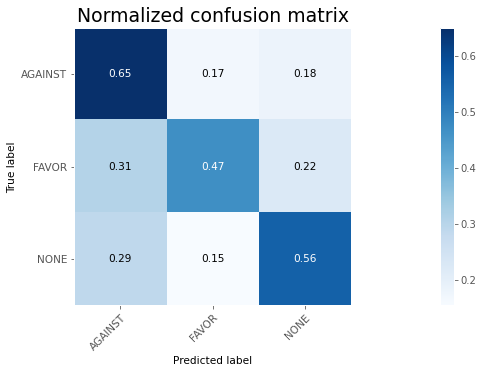

In [ ]:
true_labels, predictions_labels, avg_epoch_loss = validation(valid_dataloader, device)

# Create the evaluation report.
evaluation_report = classification_report(true_labels, predictions_labels, labels=list(labels_ids.values()), target_names=list(labels_ids.keys()))
# Show the evaluation report.
print(evaluation_report)

# Plot confusion matrix.
plot_confusion_matrix(y_true=true_labels, y_pred=predictions_labels, 
                      classes=list(labels_ids.keys()), normalize=True, 
                      magnify=0.1,
                      );

In [ ]:
#3rd run |a| model

In [ ]:
epochs=4
model.zero_grad()

Epoch


Training on batches...



Validation on batches...



  train_loss: 1.47811 - val_loss: 1.06120 - train_acc: 0.37450 - valid_acc: 0.45648

Training on batches...



Validation on batches...



  train_loss: 1.09488 - val_loss: 1.06712 - train_acc: 0.43847 - valid_acc: 0.43872

Training on batches...



Validation on batches...



  train_loss: 1.06321 - val_loss: 1.02674 - train_acc: 0.46068 - valid_acc: 0.48313

Training on batches...



Validation on batches...



  train_loss: 1.03488 - val_loss: 1.00369 - train_acc: 0.47757 - valid_acc: 0.51865




/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


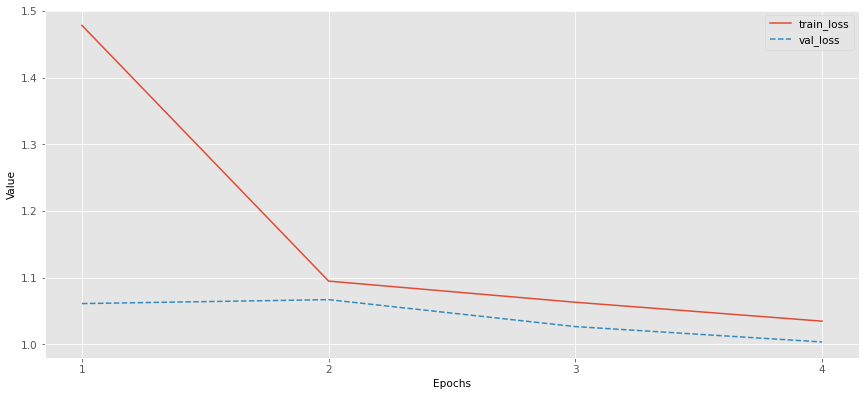

/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


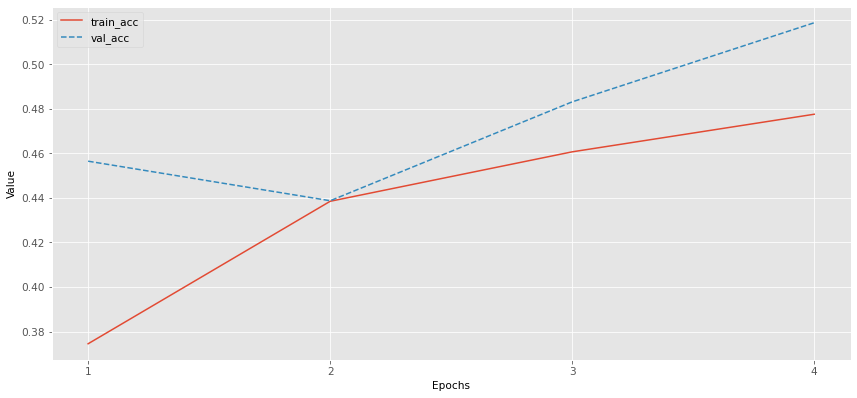

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 , # default is 1e-8.
                  )

# Total number of training steps is number of batches * number of epochs.
# `train_dataloader` contains batched data so `len(train_dataloader)` gives 
# us the number of batches.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

# Store the average loss after each epoch so we can plot them.
all_loss = {'train_loss':[], 'val_loss':[]}
all_acc = {'train_acc':[], 'val_acc':[]}

# Loop through each epoch.
print('Epoch')
for epoch in tqdm(range(epochs)):
  
  print('Training on batches...')
  # Perform one full pass over the training set.
  train_labels, train_predict, train_loss = train(train_dataloader,optimizer, scheduler, device)
  train_acc = accuracy_score(train_labels, train_predict)

  # Get prediction form model on validation data. 
  print('Validation on batches...')
  valid_labels, valid_predict, val_loss = validation(valid_dataloader, device)
  val_acc = accuracy_score(valid_labels, valid_predict)

  # Print loss and accuracy values to see how training evolves.
  print("  train_loss: %.5f - val_loss: %.5f - train_acc: %.5f - valid_acc: %.5f"%(train_loss, val_loss, train_acc, val_acc))
  print()

  # Store the loss value for plotting the learning curve.
  all_loss['train_loss'].append(train_loss)
  all_loss['val_loss'].append(val_loss)
  all_acc['train_acc'].append(train_acc)
  all_acc['val_acc'].append(val_acc)

# Plot loss curves.
plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

# Plot accuracy curves.
plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])


              precision    recall  f1-score   support

     AGAINST       0.54      0.86      0.66       274
       FAVOR       0.40      0.01      0.03       147
        NONE       0.44      0.38      0.41       142

    accuracy                           0.52       563
   macro avg       0.46      0.42      0.37       563
weighted avg       0.48      0.52      0.43       563

Normalized confusion matrix


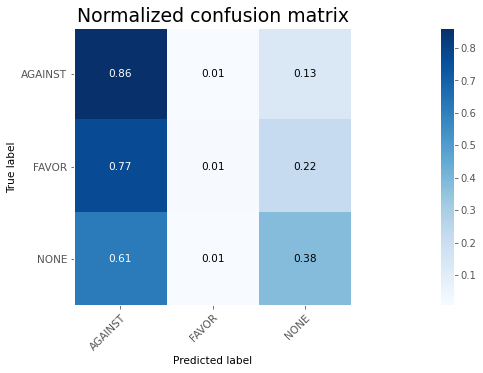

In [ ]:
true_labels, predictions_labels, avg_epoch_loss = validation(valid_dataloader, device)

# Create the evaluation report.
evaluation_report = classification_report(true_labels, predictions_labels, labels=list(labels_ids.values()), target_names=list(labels_ids.keys()))
# Show the evaluation report.
print(evaluation_report)

# Plot confusion matrix.
plot_confusion_matrix(y_true=true_labels, y_pred=predictions_labels, 
                      classes=list(labels_ids.keys()), normalize=True, 
                      magnify=0.1,
                      );

In [ ]:
# |a| model 2nd run

In [ ]:
epochs=4
model.zero_grad()

Epoch


Training on batches...



Validation on batches...



  train_loss: 1.02969 - val_loss: 0.98002 - train_acc: 0.48245 - valid_acc: 0.50622

Training on batches...



Validation on batches...



  train_loss: 0.98120 - val_loss: 0.96155 - train_acc: 0.51977 - valid_acc: 0.52575

Training on batches...



Validation on batches...



  train_loss: 0.95443 - val_loss: 0.97274 - train_acc: 0.53265 - valid_acc: 0.53108

Training on batches...



Validation on batches...



  train_loss: 0.92892 - val_loss: 0.96374 - train_acc: 0.55575 - valid_acc: 0.53641




/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


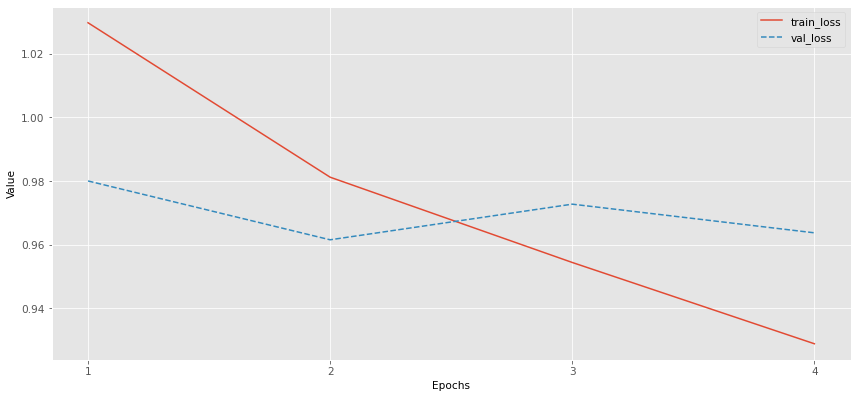

/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


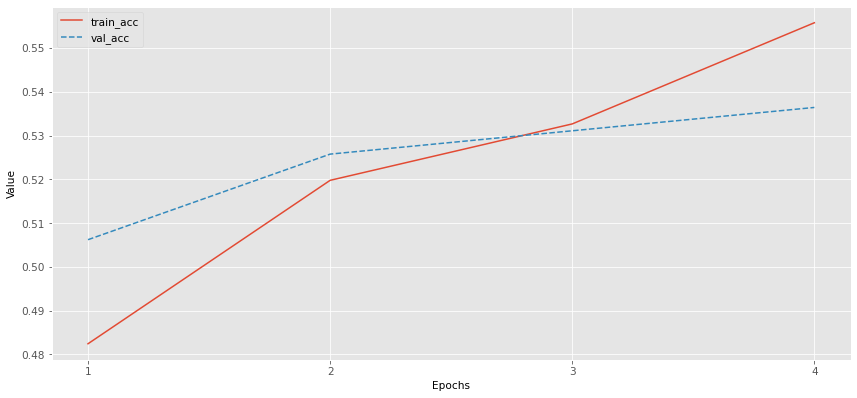

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 , # default is 1e-8.
                  )

# Total number of training steps is number of batches * number of epochs.
# `train_dataloader` contains batched data so `len(train_dataloader)` gives 
# us the number of batches.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

# Store the average loss after each epoch so we can plot them.
all_loss = {'train_loss':[], 'val_loss':[]}
all_acc = {'train_acc':[], 'val_acc':[]}

# Loop through each epoch.
print('Epoch')
for epoch in tqdm(range(epochs)):
  
  print('Training on batches...')
  # Perform one full pass over the training set.
  train_labels, train_predict, train_loss = train(train_dataloader,optimizer, scheduler, device)
  train_acc = accuracy_score(train_labels, train_predict)

  # Get prediction form model on validation data. 
  print('Validation on batches...')
  valid_labels, valid_predict, val_loss = validation(valid_dataloader, device)
  val_acc = accuracy_score(valid_labels, valid_predict)

  # Print loss and accuracy values to see how training evolves.
  print("  train_loss: %.5f - val_loss: %.5f - train_acc: %.5f - valid_acc: %.5f"%(train_loss, val_loss, train_acc, val_acc))
  print()

  # Store the loss value for plotting the learning curve.
  all_loss['train_loss'].append(train_loss)
  all_loss['val_loss'].append(val_loss)
  all_acc['train_acc'].append(train_acc)
  all_acc['val_acc'].append(val_acc)

# Plot loss curves.
plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

# Plot accuracy curves.
plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])


              precision    recall  f1-score   support

     AGAINST       0.59      0.80      0.68       274
       FAVOR       0.33      0.08      0.13       147
        NONE       0.45      0.51      0.48       142

    accuracy                           0.54       563
   macro avg       0.46      0.46      0.43       563
weighted avg       0.49      0.54      0.49       563

Normalized confusion matrix


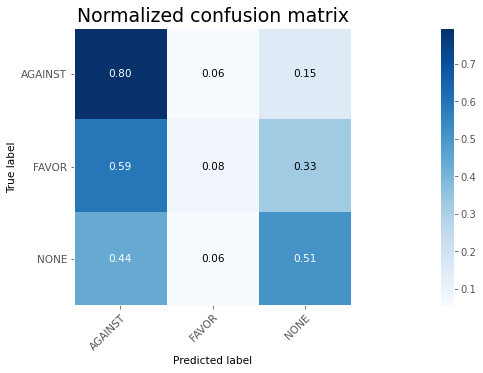

In [ ]:
true_labels, predictions_labels, avg_epoch_loss = validation(valid_dataloader, device)

# Create the evaluation report.
evaluation_report = classification_report(true_labels, predictions_labels, labels=list(labels_ids.values()), target_names=list(labels_ids.keys()))
# Show the evaluation report.
print(evaluation_report)

# Plot confusion matrix.
plot_confusion_matrix(y_true=true_labels, y_pred=predictions_labels, 
                      classes=list(labels_ids.keys()), normalize=True, 
                      magnify=0.1,
                      );

In [ ]:
# gold standard text evaluation

In [ ]:
import os
os.chdir("/content/tweet-stance-prediction-master")
os.getcwd()

In [ ]:
train_dataset.teX
#valid_dataset =  MovieReviewsDataset(train_dataset,train=False, use_tokenizer=tokenizer)
gold_dataset =  MovieReviewsDataset(train_dataset,train=None, use_tokenizer=tokenizer)
# Move pytorch dataset into dataloader.
#valid_dataloader = DataLoader(gold_dataset, batch_size=batch_size, shuffle=False, collate_fn=gpt2_classificaiton_collator)
gold_dataloader=DataLoader((gold_dataset, batch_size=batch_size, shuffle=False, collate_fn=gpt2_classificaiton_collator)
#print('Created `eval_dataloader` with %d batches!'%len(valid_dataloader))


In [ ]:
true_labels, predictions_labels, avg_epoch_loss = validation(gold_dataloader, device)

# Create the evaluation report.
evaluation_report = classification_report(true_labels, predictions_labels, labels=list(labels_ids.values()), target_names=list(labels_ids.keys()))
# Show the evaluation report.
print(evaluation_report)

# Plot confusion matrix.
plot_confusion_matrix(y_true=true_labels, y_pred=predictions_labels, 
                      classes=list(labels_ids.keys()), normalize=True, 
                      magnify=0.1,
                      );


              precision    recall  f1-score   support

     AGAINST       0.00      0.00      0.00       0.0
       FAVOR       0.00      0.00      0.00       0.0
        NONE       0.00      0.00      0.00       0.0
     UNKNOWN       0.00      0.00      0.00    1249.0

    accuracy                           0.00    1249.0
   macro avg       0.00      0.00      0.00    1249.0
weighted avg       0.00      0.00      0.00    1249.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AssertionError: ignored

In [ ]:
print(predictions_labels)
print(true_labels)

[0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 